# AFL draws data exploration - updated April 2019 

### Import libraries

In [1]:
import os
os.getcwd()

'/Users/stevegabriel/data_projects/sports_data'

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns

### Import wide format data

In [4]:
afl_wide14 = pd.read_csv("afl_dataexploration/wide_afl_run.csv")
aflwide = afl_wide14
aflwide.head()

,Unnamed: 0,seq,date,round,team1,gls_1,bhs_1,pts_1,team2,gls_2,...,t1,t2,draw_rt,etime_draw,draws_all,type,grp_2K,grp_1K,res1,res2
0,1,1,1897-05-08,R1,Fitzroy,6,13,49,Carlton,2,...,FI,CA,0,0,0,reg_season,1,1,1,2
1,2,2,1897-05-08,R1,Collingwood,5,11,41,St Kilda,2,...,CO,SK,0,0,0,reg_season,1,1,1,2
2,3,3,1897-05-08,R1,Geelong,3,6,24,Essendon,7,...,GE,ES,0,0,0,reg_season,1,1,2,1
3,4,4,1897-05-08,R1,South Melbourne,3,9,27,Melbourne,6,...,SM,ME,0,0,0,reg_season,1,1,2,1
4,5,5,1897-05-15,R2,South Melbourne,6,4,40,Carlton,5,...,SM,CA,0,0,0,reg_season,1,1,1,2


### Delete the first column: 'Unnamed:0'

In [5]:
aflwide = aflwide.drop('Unnamed: 0', axis = 1)
aflwide.tail()

,seq,date,round,team1,gls_1,bhs_1,pts_1,team2,gls_2,bhs_2,...,t1,t2,draw_rt,etime_draw,draws_all,type,grp_2K,grp_1K,res1,res2
15447,15448,2019-04-20,R5,Melbourne,7,13,55,St Kilda,15,5,...,ME,SK,0,0,0,reg_season,8,16,2,1
15448,15449,2019-04-20,R5,Richmond,13,11,89,Sydney,10,7,...,RI,SY,0,0,0,reg_season,8,16,1,2
15449,15450,2019-04-21,R5,Western Bulldogs,7,15,57,Carlton,15,11,...,WB,CA,0,0,0,reg_season,8,16,2,1
15450,15451,2019-04-21,R5,Adelaide,18,11,119,Gold Coast,6,10,...,AD,GC,0,0,0,reg_season,8,16,1,2
15451,15452,2019-04-22,R5,Hawthorn,13,12,90,Geelong,17,11,...,HA,GE,0,0,0,reg_season,8,16,2,1


### The index and seq values are not aligned - reset index

In [6]:
aflwide.index += 1

In [7]:
aflwide.head()

,seq,date,round,team1,gls_1,bhs_1,pts_1,team2,gls_2,bhs_2,...,t1,t2,draw_rt,etime_draw,draws_all,type,grp_2K,grp_1K,res1,res2
1,1,1897-05-08,R1,Fitzroy,6,13,49,Carlton,2,4,...,FI,CA,0,0,0,reg_season,1,1,1,2
2,2,1897-05-08,R1,Collingwood,5,11,41,St Kilda,2,4,...,CO,SK,0,0,0,reg_season,1,1,1,2
3,3,1897-05-08,R1,Geelong,3,6,24,Essendon,7,5,...,GE,ES,0,0,0,reg_season,1,1,2,1
4,4,1897-05-08,R1,South Melbourne,3,9,27,Melbourne,6,8,...,SM,ME,0,0,0,reg_season,1,1,2,1
5,5,1897-05-15,R2,South Melbourne,6,4,40,Carlton,5,6,...,SM,CA,0,0,0,reg_season,1,1,1,2


In [8]:
aflwide.dtypes

seq            int64
date          object
round         object
team1         object
gls_1          int64
bhs_1          int64
pts_1          int64
team2         object
gls_2          int64
bhs_2          int64
pts_2          int64
venue         object
state         object
hvar           int64
aggr           int64
year           int64
month          int64
t1            object
t2            object
draw_rt        int64
etime_draw     int64
draws_all      int64
type          object
grp_2K         int64
grp_1K         int64
res1           int64
res2           int64
dtype: object

In [9]:
# Add token column to enable game/yr count:
aflwide['game'] = 1  

## How many draws have there been?

In [10]:
aflwide['draws_all'].value_counts()

0    15292
1      160
Name: draws_all, dtype: int64

#### The 160 drawn matches includes two finals that were decided after extra-time. These were:
    * The 1994 2nd Qualifying Final between North Melbourne and Hawthorn.
    * The 2007 2nd Semi-Final between Collingwood and West Coast.

In [11]:
aflwide['draw_rt'].value_counts()

0    15294
1      158
Name: draw_rt, dtype: int64

These 158 draws exclude the two extra-time decided matches. 

### Aggregate specific data by year, as required

### 1. Aggregate all_draws column, so that we have draws per year

In [12]:
yrdraws = aflwide.groupby(by=['year'])[['draws_all','game']].sum()
yrdraws.head()

,draws_all,game
year,,
1897,1,62
1898,1,70
1899,0,69
1900,0,70
1901,1,71


#### Replace current index (year) with regular integer index

In [13]:
yrdraws.reset_index(level=0, inplace=True)
yrdraws.dtypes

year         int64
draws_all    int64
game         int64
dtype: object

In [14]:
yrdraws.head()

,year,draws_all,game
0,1897,1,62
1,1898,1,70
2,1899,0,69
3,1900,0,70
4,1901,1,71


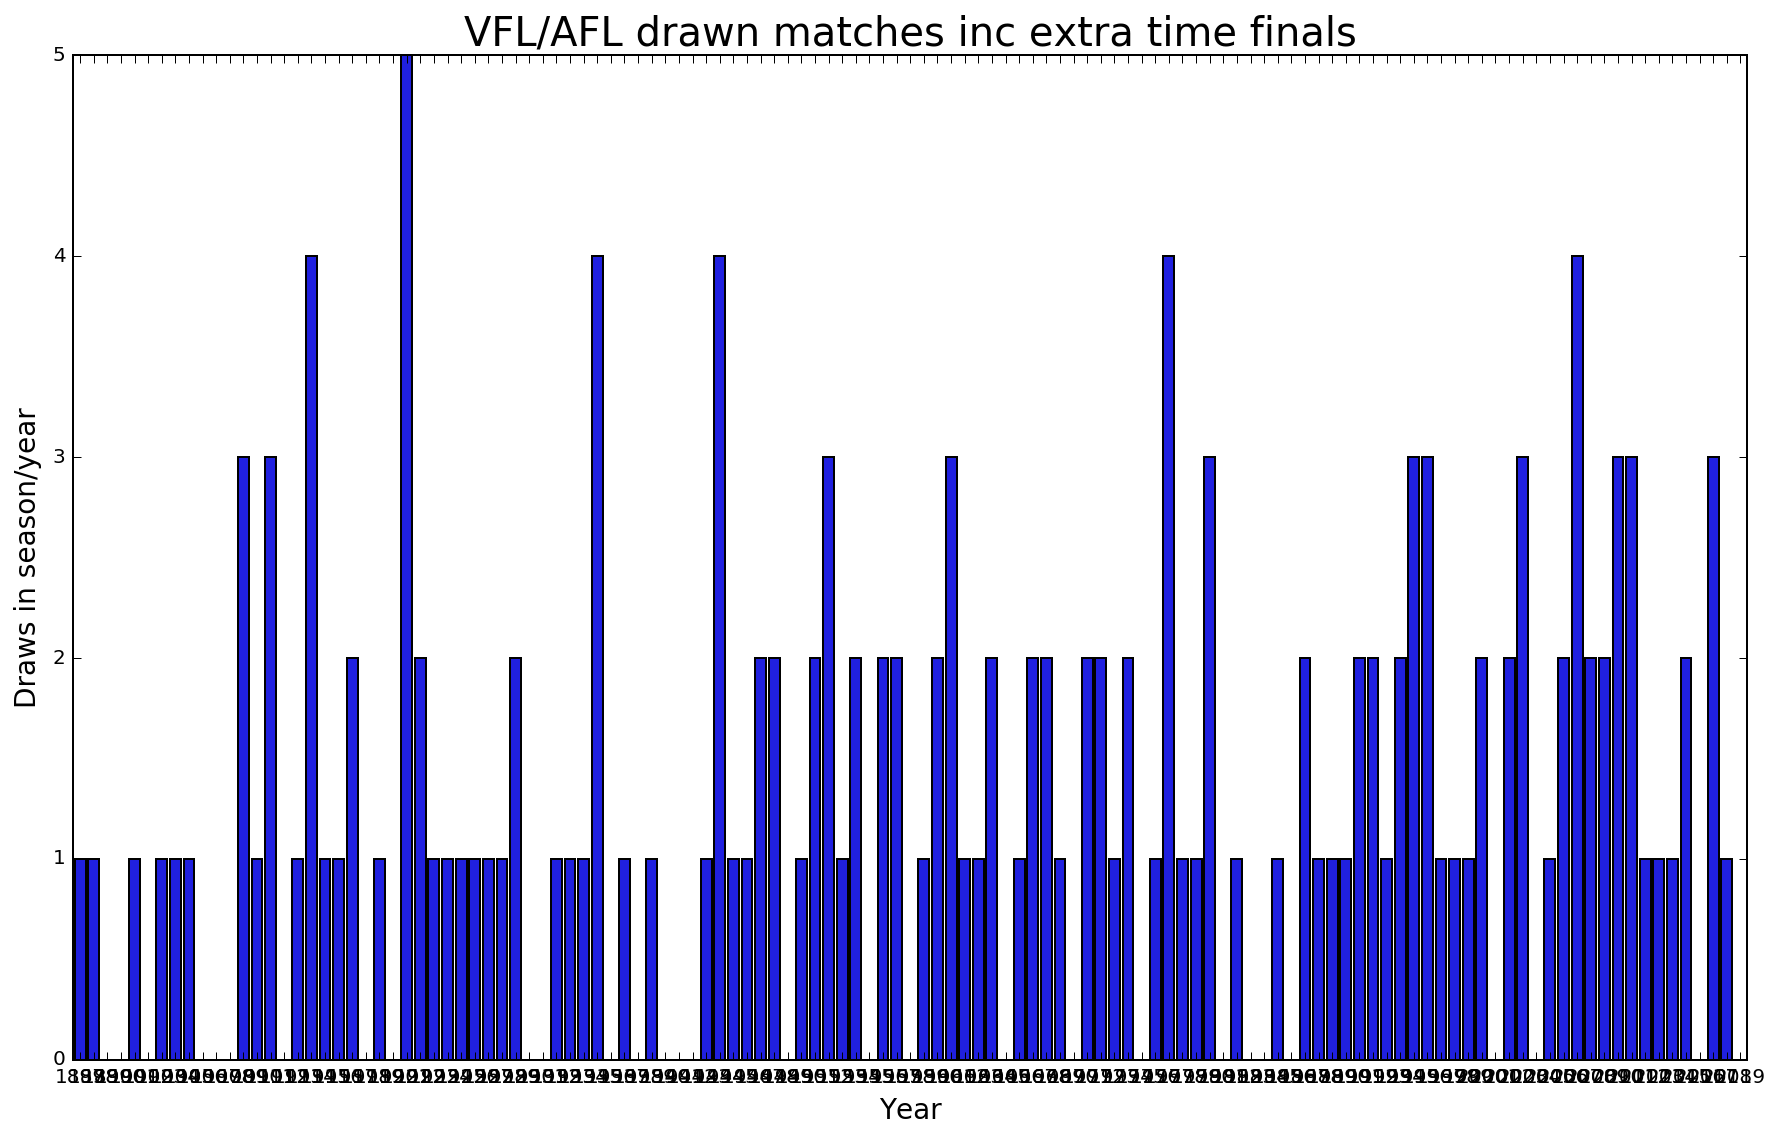

In [15]:
plt.subplots(figsize=(15,9))
tscores = sns.barplot(data = yrdraws,y= "draws_all", x= "year",color  = "blue")
plt.xlabel('Year',fontsize=14)
plt.ylabel('Draws in season/year', fontsize=14)
plt.title('VFL/AFL drawn matches inc extra time finals', fontsize=20)
plt.show()

### The rate/games of draws will be different to the yearly rate of draws, since the number of games per year has changed many times since 1897.

In [16]:
yrdraws['rate_thou'] = yrdraws['draws_all']*1000/yrdraws['game']

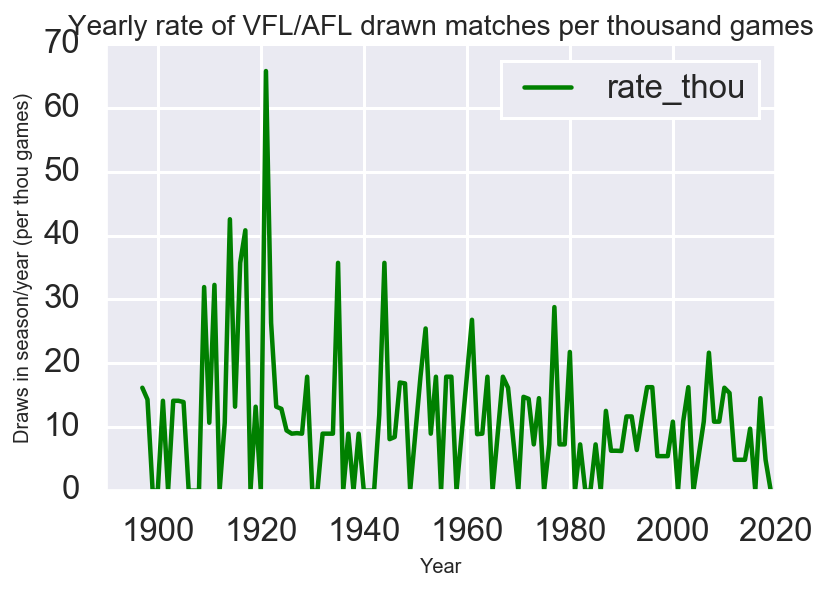

In [17]:
# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default, and was used in the plots above.
sns.set_style("darkgrid")
sns.set_context("talk")
yrdraws.plot(kind = 'line', x = 'year', y = 'rate_thou', color = 'green',xlim = [1890,2020])
plt.xlabel('Year',fontsize=10)
plt.ylabel('Draws in season/year (per thou games)', fontsize=10)
plt.title('Yearly rate of VFL/AFL drawn matches per thousand games', fontsize=14)
plt.show()

In [18]:
import numpy as np
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [19]:
draws_rolling = yrdraws.rolling(window=15).mean()
draws_rolling.tail()

,year,draws_all,game,rate_thou
118,2008.0,1.800000,191.600000,9.474876
119,2009.0,1.800000,193.066667,9.474876
120,2010.0,1.866667,194.533333,9.720338
121,2011.0,1.733333,196.000000,8.961318
122,2012.0,1.733333,186.666667,8.961318


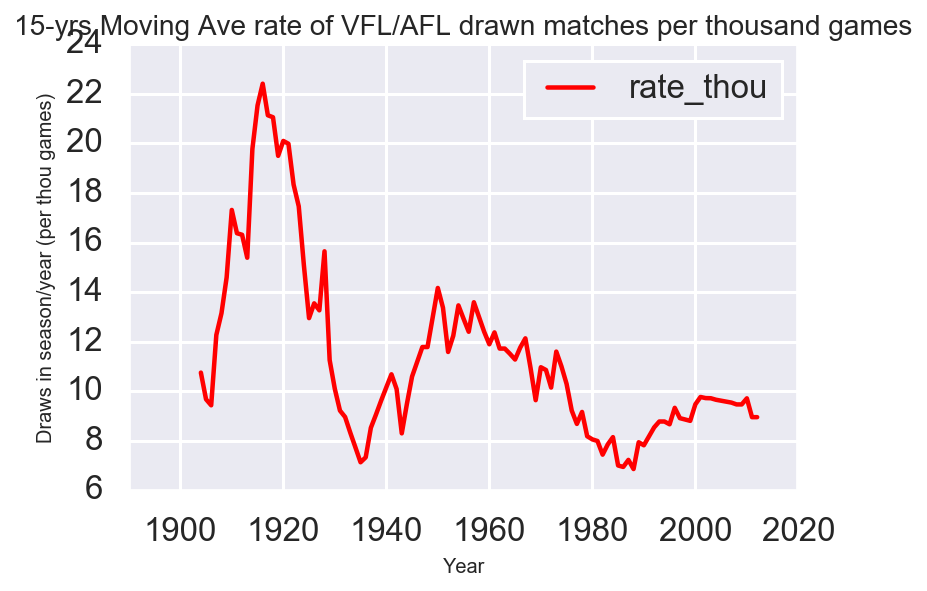

In [20]:
sns.set_style("darkgrid")
sns.set_context("talk")
draws_rolling.plot(kind = 'line', x = 'year', y = 'rate_thou', color = 'red',xlim = [1890,2020])
plt.xlabel('Year',fontsize=10)
plt.ylabel('Draws in season/year (per thou games)', fontsize=10)
plt.title('15-yrs Moving Ave rate of VFL/AFL drawn matches per thousand games', fontsize=14)
plt.show()

In [21]:
yragg = aflwide.groupby(by=['year'])[['aggr','year']].mean()
yragg.tail(10)

,aggr,year
year,,
2010,180.327957,2010.0
2011,185.602041,2011.0
2012,183.724638,2012.0
2013,184.787440,2013.0
2014,173.763285,2014.0
2015,172.757282,2015.0
2016,177.342995,2016.0
2017,178.198068,2017.0
2018,166.159420,2018.0


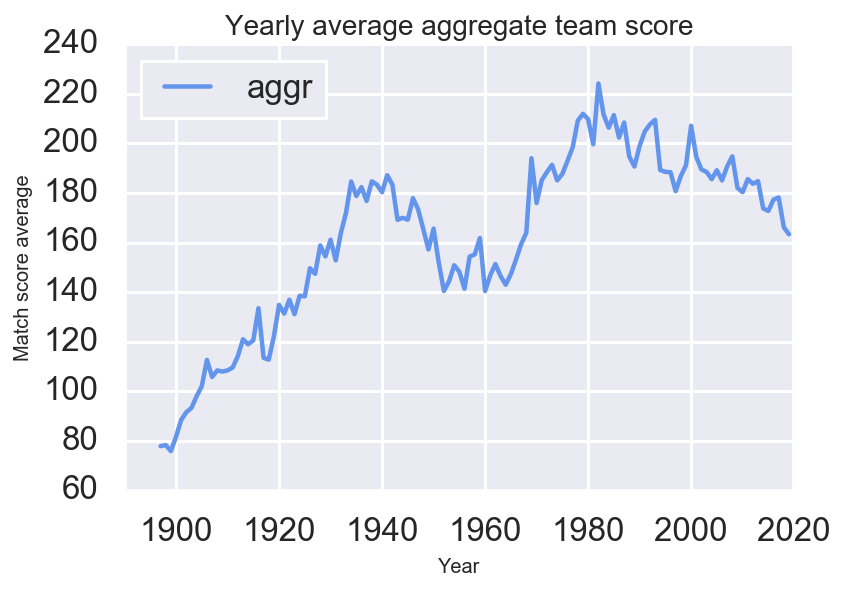

In [22]:
sns.set_style("darkgrid")
sns.set_context("talk")
yragg.plot(kind = 'line', x = 'year', y = 'aggr', color = 'cornflowerblue',xlim = [1890,2020])
plt.xlabel('Year',fontsize=10)
plt.ylabel('Match score average', fontsize=10)
plt.title('Yearly average aggregate team score', fontsize=14)
plt.show()

## Join draws_rolling and yragg, and plot score rate v draws rate by year 